In [4]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
# df

In [8]:
con = df['Species'] == 'Perch'
p_data = df.loc[con]
# p_data

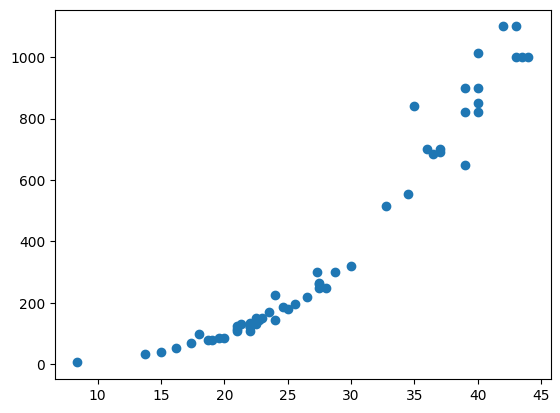

In [9]:
import matplotlib.pyplot as plt

plt.scatter(p_data['Length2'], p_data['Weight'])

In [12]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(p_data[['Length2']], p_data[['Weight']])

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [17]:
knr.score(test_input, test_target)

0.9875618947309107

In [19]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
# print(test_input, test_prediction)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

30.63571428571429


In [21]:
knr.score(train_input, train_target)

0.9757244156204513

In [25]:
# 수치 조정, 원래는 5였다
knr.n_neighbors = 5
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9757244156204513
0.9875618947309107


C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


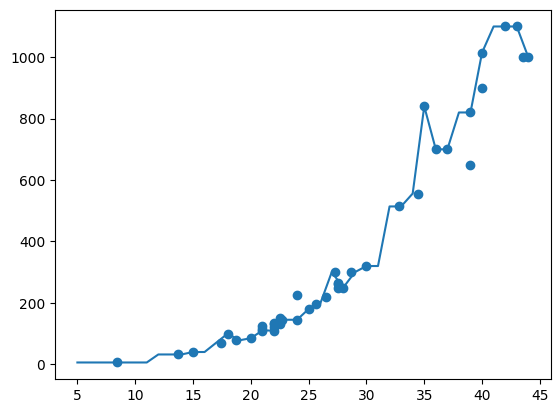

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


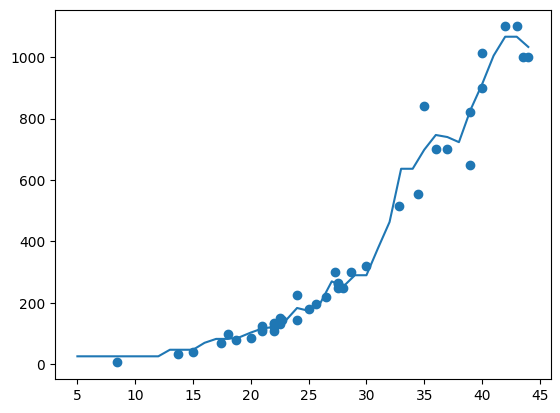

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


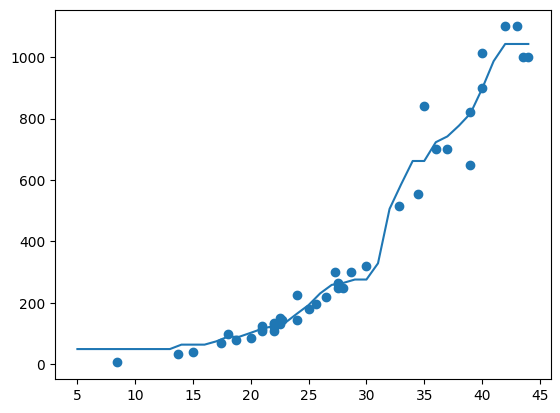

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


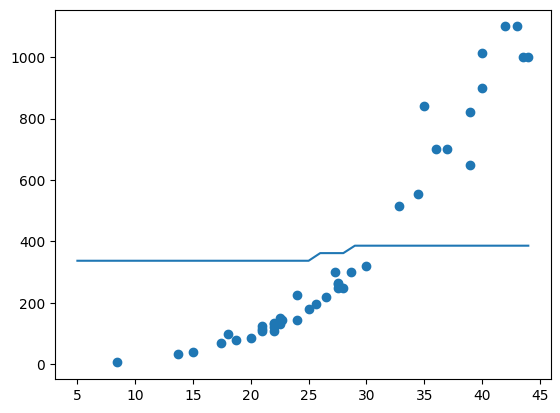

In [30]:
import numpy as np
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

# n이 40이면 과대적합
for n in [1,3,5,40]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.show()